## 0. Python & Pandas Data Types
Explore different data types and fix common issues.

In [93]:
# Exercise 0.1: Identify types
a = [1, 2, 3]
b = {'key': 10}
c = (4.5, True)
d = set([1, 2, 2])
e = None
# SOLUTION: Print type of each variable


In [94]:
# Exercise 0.2: Create Series from each and inspect dtype
import pandas as pd
s1 = pd.Series(a)
# SOLUTION: Convert b.values, c, and d into Series and print .dtype


In [95]:
# Exercise 0.3: Fix the conversion error
df = pd.DataFrame({'col': ['1', '2', 'three', '4']})
# Convert to integer, coerce errors to NaN
# SOLUTION: Fix this line
df['col'] = pd.to_numeric(df['col'], errors='coerce')


## 1. Load & Clean Dataset
Read the dataset, check for missing values, and standardize column names.

In [96]:
# Exercise 1.1: Load dataset and display info
import pandas as pd
df = pd.read_csv(r'Superstore_Modified.csv')
df.head()

df.info()

GROUPER_COLUMN = 'Sub-Category'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1000 non-null   object 
 1   Order Date    1000 non-null   object 
 2   Category      1000 non-null   object 
 3   Region        1000 non-null   object 
 4   Sales         990 non-null    float64
 5   Profit        990 non-null    float64
 6   Quantity      1000 non-null   int64  
 7   Customer ID   1000 non-null   object 
 8   Sub-Category  1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


In [97]:
df = df.dropna()

In [98]:
df.head(4)

,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category
0,CA-1000,2020-01-01,Technology,Central,650.22,-112.56,6,CUST-1127,Accessories
1,CA-1001,2020-01-02,Furniture,Central,296.81,227.87,5,CUST-1313,Bookcases
2,CA-1002,2020-01-03,Technology,Central,652.31,-86.41,5,CUST-1331,Accessories
3,CA-1003,2020-01-04,Technology,Central,562.99,218.52,1,CUST-1149,Copiers


In [99]:
# Exercise 1.2: Clean column names to snake_case
def clean_columns(columns):
    return [col.lower().replace(' ', '_') for col in columns]

#df.columns = clean_columns(df.columns)
# Apply this to df.columns


In [100]:
# Exercise 1.3: Check and report missing values
# SOLUTION: Use df.isna() and .any() to report


## 2. Pivot and Unpivot
Practice reshaping data for reporting.

In [101]:
df

,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category
0,CA-1000,2020-01-01,Technology,Central,650.22,-112.56,6,CUST-1127,Accessories
1,CA-1001,2020-01-02,Furniture,Central,296.81,227.87,5,CUST-1313,Bookcases
2,CA-1002,2020-01-03,Technology,Central,652.31,-86.41,5,CUST-1331,Accessories
3,CA-1003,2020-01-04,Technology,Central,562.99,218.52,1,CUST-1149,Copiers
4,CA-1004,2020-01-05,Furniture,South,790.85,-60.36,5,CUST-1453,Bookcases
...,...,...,...,...,...,...,...,...,...
995,CA-1995,2022-09-22,Office Supplies,East,169.95,-147.30,5,CUST-1284,Binders
996,CA-1996,2022-09-23,Office Supplies,West,692.37,182.22,5,CUST-1125,Binders
997,CA-1997,2022-09-24,Technology,Central,358.85,4.84,2,CUST-1920,Copiers
998,CA-1998,2022-09-25,Technology,East,702.01,127.59,8,CUST-1438,Accessories


In [102]:
# Exercise 2.1: Create pivot table of Sales by Region and Category
# SOLUTION: Use pd.pivot_table

pivot = pd.pivot_table(df, values='Sales', index='Region', columns=GROUPER_COLUMN, aggfunc='sum')
print(pivot)

Sub-Category   Accessories       Binders  Bookcases        Chairs   Copiers  \
Region                                                                        
Central       14120.030000  22592.978084   15998.72  17160.568084  15724.78   
East          15685.718084  14983.990000   13059.53  21211.608084  13715.10   
South         13935.240000   8521.120000   11620.71  13694.978084  10977.44   
West          20871.886168   9671.660000   14091.92  19684.758084  12721.30   

Sub-Category    Labels         Paper        Phones    Tables  
Region                                                        
Central       13969.72  17017.128084  12304.030000  17927.68  
East          17482.88  20150.270000  14575.490000  12292.64  
South         11441.59  13759.980000  12753.340000  17915.41  
West          13725.71  16214.270000  14863.038084  15943.02  


In [103]:
# Exercise 2.2: Unpivot the table using pd.melt
# SOLUTION: Melt the pivoted frame back

melted = pd.melt(pivot.reset_index(), id_vars='Region')
melted.head()

,Region,Sub-Category,value
0,Central,Accessories,14120.030000
1,East,Accessories,15685.718084
2,South,Accessories,13935.240000
3,West,Accessories,20871.886168
4,Central,Binders,22592.978084


In [104]:
melted = pd.melt(pivot.reset_index(), id_vars='Region')

In [105]:
# Exercise 2.3: Debug this code
# This line raises an error. Fix it.
# pivot = df.pivot(index='Category', columns='Region', values='Sales', aggfunc='sum')


## 3. Grouping, Aggregation and Merging
Group, summarize, and merge statistics.

In [106]:
# Exercise 3.1: Group by Category, aggregate Sales, Profit, Quantity
# SOLUTION: Use .groupby and .agg

grouped = df.groupby(GROUPER_COLUMN).agg({'Sales': 'sum', 'Profit': 'mean', 'Quantity': 'sum'})
print(grouped)

                     Sales      Profit  Quantity
Sub-Category                                    
Accessories   64612.874252   97.426521       534
Binders       55769.748084   66.864559       525
Bookcases     54770.880000   24.136262       542
Chairs        71751.912336  109.420640       621
Copiers       53138.620000   58.279300       483
Labels        56619.900000   48.354421       484
Paper         67141.648084   74.736715       602
Phones        54495.898084   55.977145       527
Tables        64078.750000   37.515923       599


In [107]:
# Exercise 3.2: Merge stats back to original df
# SOLUTION: Use .merge with suffixes

df = df.merge(grouped, on=GROUPER_COLUMN, suffixes=('', '_cat'))
df.head()

,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category,Sales_cat,Profit_cat,Quantity_cat
0,CA-1000,2020-01-01,Technology,Central,650.22,-112.56,6,CUST-1127,Accessories,64612.874252,97.426521,534
1,CA-1001,2020-01-02,Furniture,Central,296.81,227.87,5,CUST-1313,Bookcases,54770.880000,24.136262,542
2,CA-1002,2020-01-03,Technology,Central,652.31,-86.41,5,CUST-1331,Accessories,64612.874252,97.426521,534
3,CA-1003,2020-01-04,Technology,Central,562.99,218.52,1,CUST-1149,Copiers,53138.620000,58.279300,483
4,CA-1004,2020-01-05,Furniture,South,790.85,-60.36,5,CUST-1453,Bookcases,54770.880000,24.136262,542


In [108]:
df['qty_perc_cat'] = df['Quantity']/df['Quantity_cat']
df[df['Order ID'] == 'CA-1000']

,Order ID,Order Date,Category,Region,Sales,Profit,Quantity,Customer ID,Sub-Category,Sales_cat,Profit_cat,Quantity_cat,qty_perc_cat
0,CA-1000,2020-01-01,Technology,Central,650.22,-112.56,6,CUST-1127,Accessories,64612.874252,97.426521,534,0.011236


In [109]:
# Exercise 3.3: Write a function that takes a dataframe and returns group statistics by a column
def group_summary(df, group_col):
    # SOLUTION:
    return df.groupby(group_col).agg({'Sales': 'sum', 'Profit': 'mean', 'Quantity': 'sum'}).reset_index()


## 4. Outlier Detection
Use z-scores and visualizations to detect outliers.

In [110]:
# Exercise 4.1: Add z-score column for Profit and flag |z| > 3
# SOLUTION: Use scipy.stats.zscore

from scipy.stats import zscore
df['profit_z'] = zscore(df['Profit'])
df['is_outlier'] = df['profit_z'].abs() > 3

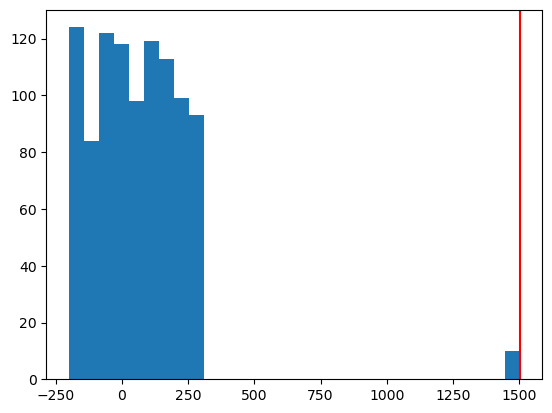

In [111]:
# Exercise 4.2: Plot histogram with outliers
# SOLUTION: Use matplotlib to color outliers differently

import matplotlib.pyplot as plt
plt.hist(df['Profit'], bins=30)
outliers = df[df['is_outlier']]
plt.axvline(outliers['Profit'].mean(), color='red')
plt.show()

In [112]:
# Exercise 4.3: Debug this broken outlier logic
df['Profit_z'] = (df['Profit'] - df['Profit'] .mean()) / df['Profit'] .std()  # Fix it


In [113]:
# Exercise 4.4: Calculate z-score for 'Profit' within each Category and Region group
# SOLUTION:
df['profit_per_qty'] = df['Profit']/df['Quantity']
df['profit_group_z'] = df.groupby([GROUPER_COLUMN, 'Region'])['profit_per_qty'].transform(lambda x: (x - x.mean()) / x.std())
df['group_outlier'] = df['profit_group_z'].abs() > 3
df[df['group_outlier']==True].head(4)

df = df[df['group_outlier']!=True]


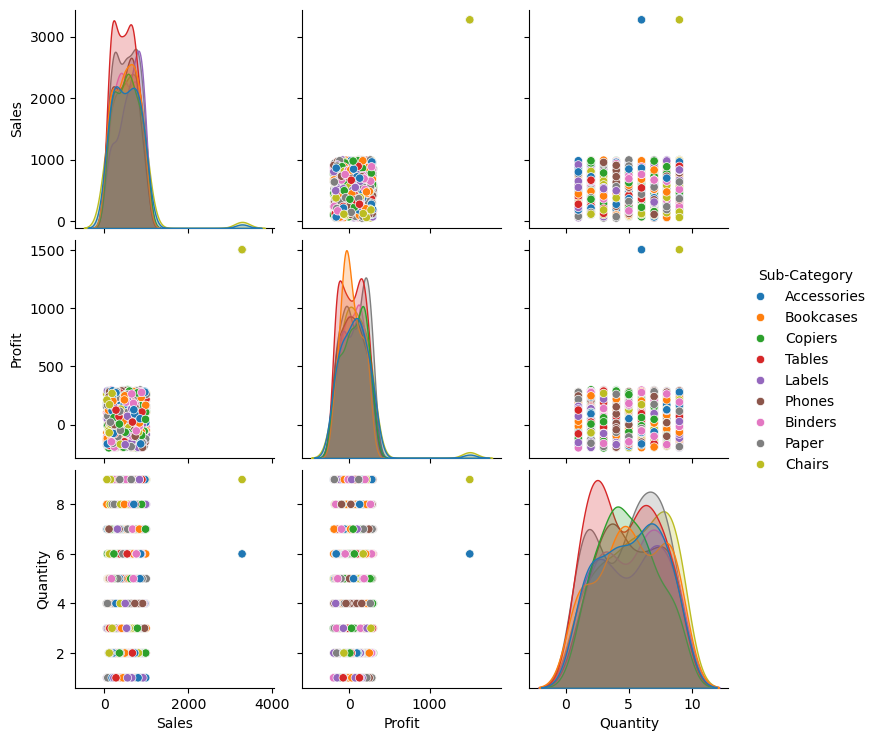

In [115]:
# Exercise 4.5: Use seaborn to create a pairplot of numeric variables
# SOLUTION:
import seaborn as sns
sns.pairplot(df[['Sales', 'Profit', 'Quantity', GROUPER_COLUMN]].dropna(), hue=GROUPER_COLUMN)


## 5. Time Series Resampling
Resample to monthly level and visualize.

In [56]:
# Exercise 5.1: Convert 'Order Date' to datetime and set as index
# SOLUTION: pd.to_datetime and set index

df['Order Date'] = pd.to_datetime(df['Order Date'])
#df = df.set_index('Order Date') 

In [57]:
# Exercise 5.2: Resample sales monthly and fill missing
# SOLUTION: Use resample + fillna

monthly = df.resample('M', on='Order Date').sum(numeric_only=True)
monthly = monthly.fillna(0)
print(monthly.head())

                   Sales      Profit  Quantity     Sales_cat   Profit_cat  \
Order Date                                                                  
2020-01-31  16835.030000  2039.88000       146  1.864317e+06  2007.027087   
2020-02-29  15484.140000  1409.42000       152  1.601200e+06  1525.136991   
2020-03-31  19400.788084  4206.55591       129  1.904925e+06  2085.541619   
2020-04-30  12439.410000   745.67000       158  1.843858e+06  1956.934992   
2020-05-31  14523.330000   474.36000       144  1.758661e+06  1973.945461   

            Quantity_cat   profit_z  is_outlier   Profit_z  profit_per_qty  \
Order Date                                                                   
2020-01-31         16581   0.300891           0   0.300737      959.013563   
2020-02-29         14764  -1.837881           0  -1.836943      482.631810   
2020-03-31         16979  10.856048           1  10.850508     2725.219576   
2020-04-30         16782  -5.693113           0  -5.690208      529.55

C:\Users\Dominik.Prorok\AppData\Local\Temp\ipykernel_22824\1053747117.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='Order Date').sum(numeric_only=True)


<Axes: title={'center': 'Monthly Sales'}, xlabel='Order Date'>

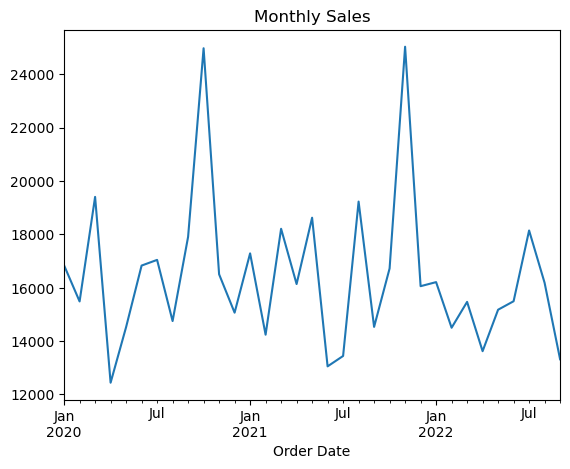

In [58]:
# Exercise 5.3: Plot monthly sales trend
# SOLUTION: Use matplotlib

monthly['Sales'].plot(title='Monthly Sales')

In [59]:
# Exercise 5.4: Detect monthly outliers in resampled sales using z-score
# SOLUTION:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_z = (monthly_sales - monthly_sales.mean()) / monthly_sales.std()
monthly_outliers = monthly_z.abs() > 2
monthly_result = pd.DataFrame({'Sales': monthly_sales, 'Z-Score': monthly_z, 'Outlier': monthly_outliers})
monthly_result.head(5)

C:\Users\Dominik.Prorok\AppData\Local\Temp\ipykernel_22824\3731208062.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


,Sales,Z-Score,Outlier
Order Date,,,
2020-01-31,16835.030000,0.140904,False
2020-02-29,15484.140000,-0.335835,False
2020-03-31,19400.788084,1.046378,False
2020-04-30,12439.410000,-1.410342,False
2020-05-31,14523.330000,-0.674912,False


## 6. Feature Engineering
Create new useful variables for modeling.

In [60]:
# Exercise 6.1: Add log_sales and profit_per_unit
# SOLUTION: Create log and ratio features
import numpy as np

df['profit_per_unit'] = df['Profit'] / (df['Quantity'])
df['sales_per_unit'] = df['Sales'] / (df['Quantity'])
df['log_sales'] = np.log1p(df['Sales'])+np.min(df['Sales'])+1


In [61]:
# Exercise 6.2: Create dummies for Region (like one-hot-encoding)
# SOLUTION: Use pd.get_dummies

region_dummies = pd.get_dummies(df['Region'], prefix='region')
df = pd.concat([df, region_dummies], axis=1)

In [62]:
# Exercise 6.3: Automate feature engineering (ratio fretures, unit features, daily rate features (only for monthly))



In [63]:
import numpy as np

# Exercise 6.4: Add more features like sales_to_profit ratio, squared quantity, and log of quantity
# SOLUTION:
df['sales_to_profit'] = df['Sales'] / (df['Profit'] + 1e-5)
df['quantity_squared'] = df['Quantity'] ** 2
df['log_quantity'] = np.log1p(df['Quantity'])

## 7. Linear Modeling with statsmodels
Fit OLS model and evaluate.

In [64]:
# Exercise 7.1: Predict profit from sales and quantity
import statsmodels.api as sm
# SOLUTION: Fit and print model

X = sm.add_constant(df[['Sales', 'Quantity']])
y = df['Profit']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           7.24e-63
Time:                        17:10:37   Log-Likelihood:                -6464.9
No. Observations:                 980   AIC:                         1.294e+04
Df Residuals:                     977   BIC:                         1.295e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.3355     14.990     -5.559      0.0

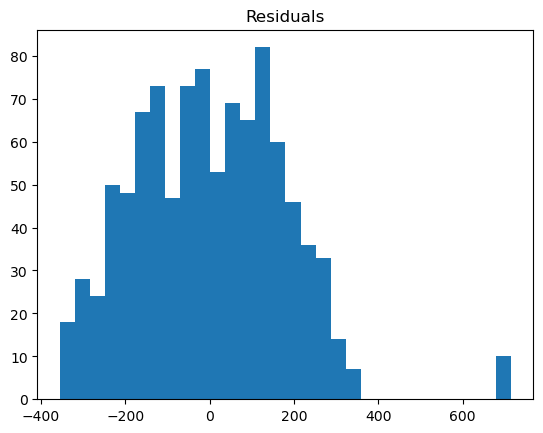

In [65]:
# Exercise 7.2: Plot residuals
# SOLUTION: matplotlib or seaborn residual plot

import matplotlib.pyplot as plt
residuals = model.resid
plt.hist(residuals, bins=30)
plt.title('Residuals')
plt.show()

In [66]:
# Exercise 7.3: Fix this buggy model fit
model = sm.OLS(df['Profit'], df[['Sales', 'Quantity']].values).fit()

X = sm.add_constant(df[['Sales', 'Quantity']])
model = sm.OLS(df['Profit'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     166.2
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           7.24e-63
Time:                        17:10:37   Log-Likelihood:                -6464.9
No. Observations:                 980   AIC:                         1.294e+04
Df Residuals:                     977   BIC:                         1.295e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -83.3355     14.990     -5.559      0.0

In [67]:
df.columns

Index(['Order ID', 'Order Date', 'Category', 'Region', 'Sales', 'Profit',
       'Quantity', 'Customer ID', 'Sub-Category', 'Sales_cat', 'Profit_cat',
       'Quantity_cat', 'profit_z', 'is_outlier', 'Profit_z', 'profit_per_qty',
       'profit_group_z', 'group_outlier', 'profit_per_unit', 'sales_per_unit',
       'log_sales', 'region_Central', 'region_East', 'region_South',
       'region_West', 'sales_to_profit', 'quantity_squared', 'log_quantity'],
      dtype='object')

In [68]:
# Exercise 7.4: Fit a separate linear model per Category to predict Profit
# SOLUTION:
categories = df[GROUPER_COLUMN].unique()
for cat in categories:
    sub_df = df[df[GROUPER_COLUMN] == cat]
    X = sm.add_constant(sub_df[['sales_per_unit']])
    y = sub_df['profit_per_unit']
    model = sm.OLS(y, X).fit()
    print(f"Category: {cat}, R²: {model.rsquared:.3f}")


Category: Accessories, R²: 0.841
Category: Bookcases, R²: 0.025
Category: Copiers, R²: 0.022
Category: Tables, R²: 0.147
Category: Labels, R²: 0.005
Category: Phones, R²: 0.340
Category: Binders, R²: 0.706
Category: Paper, R²: 0.103
Category: Chairs, R²: 0.308


In [ ]:
# Exercise: Use glob to list all Excel files in a directory
# SOLUTION:
import glob
csv_files = glob.glob("*.csv")
print(csv_files)


['Superstore.csv', 'Superstore_Modified.csv']


In [ ]:
# Exercise (Optional Advanced): Use ipywidgets to create a dropdown to filter by Region
# SOLUTION:
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

def plot_region(region):
    subset = df[df['Region'] == region][['Sales', 'Profit', 'Quantity', GROUPER_COLUMN]].dropna()
    if not subset.empty:
        sns.pairplot(subset, hue=GROUPER_COLUMN)
        plt.show()
    else:
        print("No data available for selected region.")

dropdown = widgets.Dropdown(options=df['Region'].dropna().unique(), description='Region:')
widgets.interact(plot_region, region=dropdown);


interactive(children=(Dropdown(description='Region:', options=('Central', 'South', 'East', 'West'), value='Cen…